<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 8

### Problem 0 (3 points)

## Part 1: Camera Transformations

### Problem 1.1 (Exam Style)

## Part 2: Epipolar Geometry 

### Problem 2.1 (Exam Style)

### Problem 2.2 (Exam Style)

### Problem 2.3 (Exam Style)

## Part 3: 3D Reconstruction

In [1]:
import urllib.request
import pickle
from os import path as osp


def retrieve(file_name, semester='spring21', homework=8):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        urllib.request.urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [2]:
modules = ('geometry', 'camera', 'labels', 'longuet_higgins', 'rubik', 'experiments')
for module in modules:
    retrieve('{}.py'.format(module))

Using previously downloaded file geometry.py
Using previously downloaded file camera.py
Using previously downloaded file labels.py
Using previously downloaded file longuet_higgins.py
Using previously downloaded file rubik.py
Using previously downloaded file experiments.py


In [3]:
import numpy as np
from rubik import new_cube, draw_cube
from camera import print_camera
from labels import labels as lab
from experiments import camera_pair, standard_camera
from experiments import experiment, print_features, print_stats
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

Extrinsic parameters:
	Origin (t): [115.47 115.47 115.47] mm
	Rotation matrix (R): 
		[-0.707  0.707  0.   ]
		[ 0.408  0.408 -0.816]
		[-0.577 -0.577 -0.577]

Intrinsic parameters:
	Focal distance (f): 8.585 mm
	Scaling (s): [200. 200.] pixels per mm
	Principal point (pi): [960. 540.] pixels


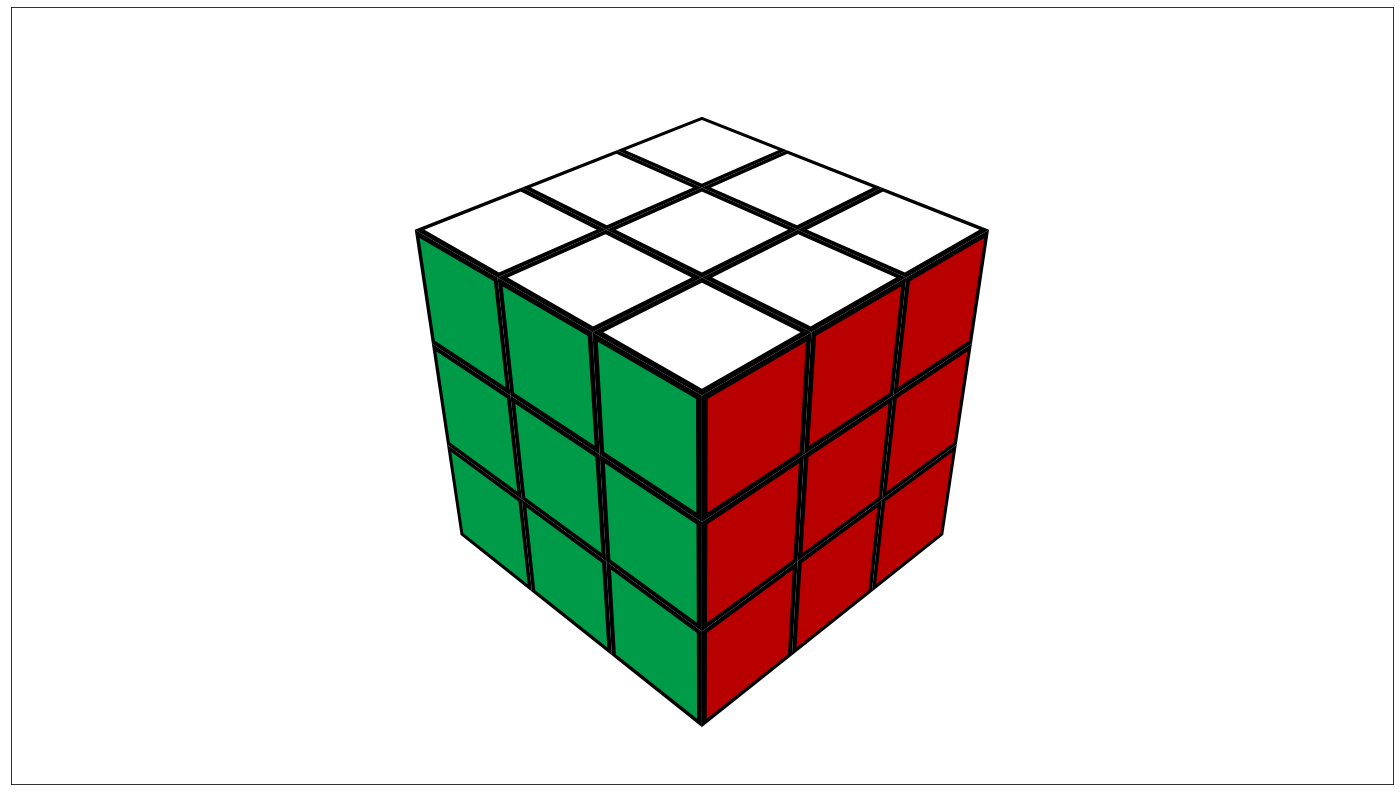

In [4]:
rubik = new_cube()
t_mm = 200. * np.ones(3) / np.sqrt(3.)
camera = standard_camera(t_mm)
print_camera(camera)
features = draw_cube(rubik, camera)

In [5]:
height_mm, circle_radius_mm = 100., 150.

vergence_degrees = 30.
stats_30 = experiment(rubik, omega_degrees=vergence_degrees,
                      height_mm=height_mm,
                      circle_radius_mm=circle_radius_mm,
                      sigma_pixels=1., repetitions=1, display=False)
print_stats(stats_30)

distance (mm): 180.278
vergence angle (degrees): 30.000
noise sigma (pixels): 1.000
translation error (degrees): median 1.090, median distance from median 0.000
rotation error (degrees): median 0.538, median distance from median 0.000
structure RMS error (baseline units): median 0.009, median distance from median 0.000


### Problem 3.1

In [6]:
sigma_pixel = (0.1, 0.2, 0.5, 1., 1.5)
omega_degrees = np.linspace(15., 50., 8)

stats_log = [] # a list of dicts

for sigma_setting in sigma_pixel:
    for omega_setting in omega_degrees:
        logged_data = experiment(rubik, sigma_pixels=sigma_setting, omega_degrees=omega_setting)
        stats_log.append(logged_data)
        

In [79]:
import pandas as pd
stats_array = np.array(pd.json.normalize(stats_log))


AttributeError: module 'pandas' has no attribute 'json'

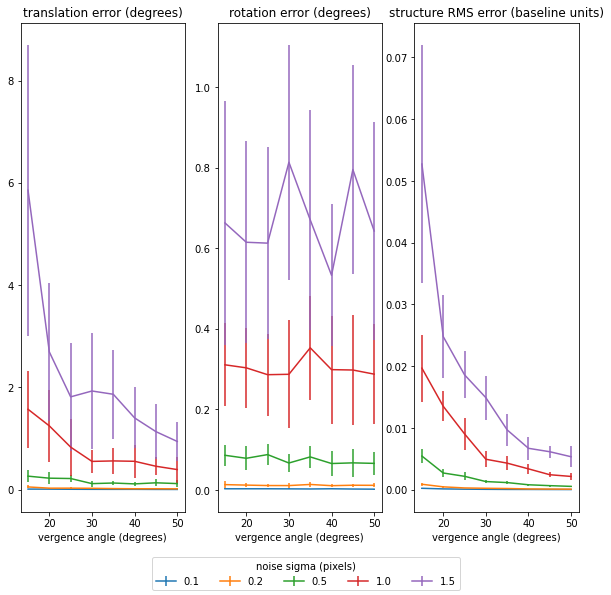

In [80]:


for k, error_type in enumerate([lab.translation, lab.rotation, lab.structure]):
    plt.subplot(1, 3, k + 1)
    for sigma in sigma_pixel:
        
        data_subset = stats_array[
            np.where(stats_array[:,2] == sigma)
        ]

        # couldn't figure out how to use the namespace names for indexing
        # but this works too, not as elegant though

        median_idx = (k*2) + 3
        err_idx = (k*2) + 4

        x, y, yerr = data_subset[:, (1, median_idx, err_idx)].T

        plt.errorbar(x, y, yerr = yerr)
        plt.title(error_type)
        plt.xlabel(lab.vergence)

plt.figlegend(sigma_pixel, loc = "lower center", title = lab.noise, ncol = 5)
plt.gcf().set_size_inches(10, 9, forward = True)

### Problem 3.2 (Exam Style)

### Problem 3.3

## Part 4: Camera Calibration 

In [ ]:
from imageio import imread

principal_point = np.array((321, 245))

def show_circles():
    plt.figure(figsize=(10, 7.6))
    plt.imshow(circles, cmap='gray')
    plt.plot([0, circles.shape[1]], 2 * [principal_point[1]], 'y')
    plt.axis('off')
    plt.tight_layout();

circles_name = 'circles.png'
retrieve(circles_name)
circles = imread(circles_name)
show_circles()

### Problem 4.1

### Problem 4.2

In [ ]:
def true_centered_coordinates(x, left_index, right_index):
    radius = np.round((x[right_index] - x[left_index]) / 2.)
    return np.arange(-13, 13) * radius

In [ ]:
# ideal_centered = true_centered_coordinates(distorted, 12, 14)

This is barrel distortion, since distorted coordinates grow sub-linearly.

### Problem 4.3

### Problem 4.4

In [ ]:
lab_name = 'lab.png'
retrieve(lab_name)
lab = imread(lab_name)

plt.figure(figsize=(10, 7.6))
plt.imshow(lab, cmap='gray')
plt.axis('off')
plt.tight_layout();

In [ ]:
retrieve('interpolate.py')
from interpolate import interpolate